In [3]:
import cv2

In [4]:
import matplotlib.pyplot as plt

In [6]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [7]:
model =cv2.dnn_DetectionModel(frozen_model,config_file)


In [10]:
classLabels =[]
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

In [13]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [15]:
print(len(classLabels))

80


In [17]:
model.setInputSize(320,320) ## as we define in config file
model.setInputScale(1.0/127.5) ##255/2=127.5
model.setInputMean((127.5,127.5,127.5)) ## mobilenet take input [-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 0000021C07EA20F0>

In [19]:
img= cv2.imread('person-with_car.jpg')

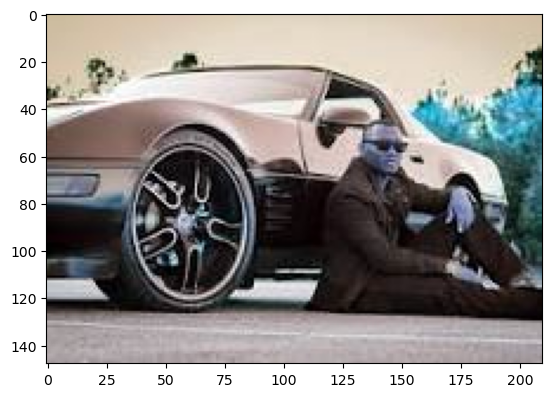

In [21]:
plt.imshow(img)

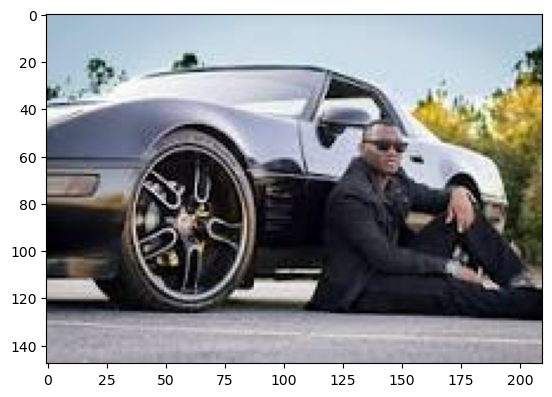

In [23]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [25]:
ClassIndex, confidece, bbox=model.detect(img,confThreshold=0.5)

In [27]:
print(ClassIndex)

[1 3 1]


In [29]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    #cv2.rectangle(frame, (x, y), (x+w, yeh), (255, 0, 0), 2)
    #cv2.putText(ing, text, (text offset, text offset y), font, fontScale font scale, color(0, 0, 0), thickness 1)
    cv2.rectangle(img, boxes, (255, 0, 0), 1) ## BGR rectangle colour is blue
    cv2.putText(img,classLabels [ClassInd-1], (boxes[0]+18, boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=1)

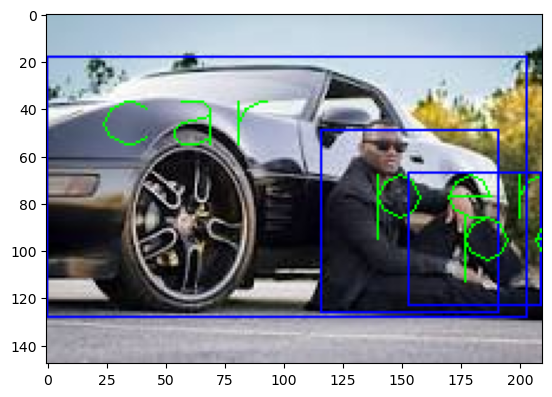

In [30]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
##Video



cap = cv2.VideoCapture('video.mp4')

#Check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open videa")
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
while True:
    ret, frame = cap.read()
    ClassIndex, confidece, bbox=model.detect(frame, confThreshold=0.5)
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255,0), thickness=3) 
                                                                                                                            
                                                                                                                            
    cv2.imshow('object Detection Tutorial', frame)
    if cv2.waitKey(2) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[3 3 3 3 4 3 3 3 4 3 3 8 3 3 3 3 8 1 4 6 3 1 1 3]
[3 3 3 3 3 4 3 3 6 3 8 1 4 3 3 3 4 3 8 3 1 3 3 3 3 1 3]
[3 3 3 3 3 6 4 3 3 8 4 3 4 3 3 1 1 1 3 1 3 8 3 1 4]
[3 3 3 3 4 4 3 6 1 4 3 3 3 3 8 8 3 3 4 3 3 4 1 3 3 8 3]
[3 3 3 3 3 3 6 3 8 3 3 4 4 3 1 4 3 8 8 3 1 3 3 3 3 3 4 3]
[3 3 3 3 3 8 3 3 3 3 4 1 4 6 3 3 3 3 8 8 4 3 3 1 3 1 1 4]
[3 3 3 3 8 3 4 4 3 3 3 3 4 1 6 4 3 3 3 3 3 1 3 3 1 3 3 3 3]
[3 3 3 3 3 4 3 3 3 8 4 4 3 3 3 4 1 3 4 3 3 3 3 3 3 3 4 3]
[3 3 3 3 3 3 4 3 1 8 3 3 4 4 3 3 3 3 4 3 3 4 3 3 4 3 8]
[3 3 3 3 3 3 3 3 3 8 4 4 4 1 3 3 3 3 4 3 3 4 3 1 1]
[3 3 3 3 3 3 3 3 4 4 4 3 3 3 1 8 3 3 3 3 3 4 4 3 1 4]
[3 3 3 3 4 3 3 4 3 3 4 3 8 3 3 4 3 3 3 3 4]
[3 3 3 3 3 3 3 3 3 4 4 3 4 3 3 8 3 8 3 3 4 1]
[3 3 3 3 3 3 3 3 3 3 8 4 3 4 3 4 4 3 3 1 6 3]
[3 3 3 3 3 3 3 3 4 4 3 3 3 4 3 3 3 4]
[3 3 3 3 3 3 3 4 3 3 4 3 4 3 3 3 3 3 4 4 3 1 3 3]
[3 3 3 3 3 4 3 3 4 3 3 4 3 3 3 3 4 1 3 3 3 4 3 1 8 3]
[3 3 3 3 3 3 3 3 4 3 8 1 3 4 3 3 3 3 4 3 4 4 3 1 3 3 3]
[3 3 3 3 3 3 4 8 3 3 4 3 3 3 1 3 3 3 3 1 3]
[3 3 3 3 3 3